Train model

In [236]:
model_csv_path = "/content/drive/MyDrive/Colab Notebooks/sepsis/modeldata.csv"

data = pd.read_csv(model_csv_path, sep=",")
# Explanation: In this line, you are using the pandas library to read data from a CSV file located at
# "/content/aggregated_data.csv." You are storing this data in a variable called "data." The sep=","
# parameter indicates that the values in the CSV file are separated by commas.
# Count the number of instances for each target class
# Gender_counts = data['Gender_first'].value_counts()
# Explanation: Here, you are counting the number of instances for each unique value in the "Gender_first"
# column of the "data" DataFrame. This is a way to see how many individuals belong to each gender category.

Sepsis_counts = data['SepsisLabel_max'].value_counts()
# Explanation: This line is similar to the previous one, but it counts the number of instances for each
# unique value in the "SepsisLabel_max" column. This helps you understand how many individuals have or
# don't have sepsis.

# Calculate the percentage of each target class
# Gender_percentages = Gender_counts / len(data) * 100
# Explanation: In this line, you are calculating the percentage of each gender category within your dataset.
# You divide the counts in "Gender_counts" by the total number of instances in the "data" DataFrame (given
# by len(data)) and then multiply by 100 to express the result as a percentage.

Sepsis_percentages = Sepsis_counts / len(data) * 100
# Explanation: Similarly, this line calculates the percentage of instances with and without sepsis in your
# dataset. It divides the counts in "Sepsis_counts" by the total number of instances in the "data"
# DataFrame and expresses the result as a percentage.

# Print the class percentages
# print(Gender_percentages)
print(Sepsis_percentages)
# print(Gender_percentages): This line prints the percentages of each gender category to the console.

# print(Sepsis_percentages): This line prints the percentages of instances with and without sepsis to
# the console. These percentages provide insights into the class distribution in your dataset, which can
# be crucial for understanding and modeling your data.

0    92.731059
1     7.268941
Name: SepsisLabel_max, dtype: float64


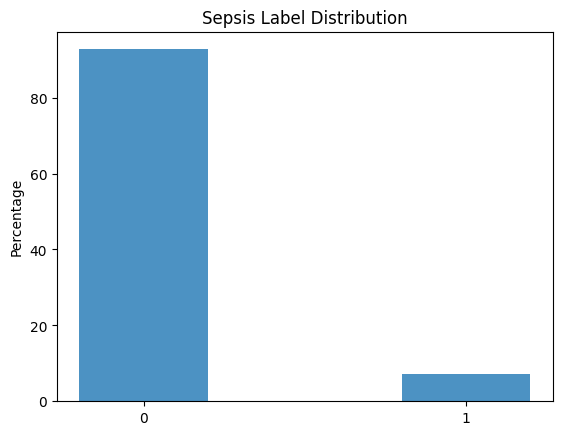

In [237]:
# Create a bar chart
fig, ax = plt.subplots()
# Explanation: In this line, you're creating a new figure ("fig") and a set of axes ("ax") for your plot.
# This is the starting point for creating your bar chart.

ax.bar(Sepsis_percentages.index, Sepsis_percentages.values, tick_label=Sepsis_percentages.index, width=0.4, align='center', alpha=0.8)
# Explanation: Here, you're using the "ax.bar" function to create a bar chart. You provide it with the x-values (Sepsis label categories),
# y-values (Sepsis percentages), and other parameters to define how the bars should appear in the chart.
# These parameters include the width of the bars, alignment, and transparency (alpha).
ax.set_ylabel('Percentage')
# Explanation: This line sets the label for the y-axis of the bar chart. It's important for labeling and
# understanding the data being visualized.

ax.set_title('Sepsis Label Distribution')
# Explanation: Here, you're adding a title to the bar chart to describe what the chart represents.
# In this case, it's the distribution of sepsis labels.

# Show the plot
plt.show()
# Explanation: Finally, this line displays the bar chart you've created using the "plt.show()" function.
# It shows the chart in your Jupyter Notebook, allowing you to visualize the distribution of sepsis labels
# in your dataset.

In [238]:
print (dataSepsis.columns)

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Chloride', 'Creatinine', 'Glucose', 'Lactate',
       'Bilirubin_total', 'TroponinI', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID', 'Unit'],
      dtype='object')


**Under Sampling**

In [239]:
data = pd.read_csv(model_csv_path, sep=",")
# Explanation: In this line, you are using the pandas library to read data from a CSV file located at
# "/content/aggregated_data.csv." You are storing this data in a variable called "data."
# The sep="," parameter indicates that the values in the CSV file are separated by commas.

majority_class = data[data['SepsisLabel_max'] == 0]
minority_class = data[data['SepsisLabel_max'] == 1]
# Explanation: After reading the data, you are splitting it into two classes based on the values in the
# "SepsisLabel_max" column. The "majority_class" variable contains instances where the "SepsisLabel_max"
# is 0, and the "minority_class" variable contains instances where the "SepsisLabel_max" is 1.

print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))
# Explanation: You're printing the number of instances in each class. The first print statement tells you
# how many instances have a "SepsisLabel_max" of 1, and the second print statement tells you how many
# instances have a "SepsisLabel_max" of 0. This is important for understanding the class distribution
# in your dataset, which can be crucial for machine learning tasks, especially in cases of imbalanced
# datasets.

number of sepsis label 1 is 2932
while number of sepsis label 0 is 37404


In [240]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
# Explanation: In this line, you are creating a subset of the majority class (the class with more instances)
# from your data. You use the .sample() function to randomly select a number of instances.
# The n=2*len(minority_class) parameter determines that you want to sample a number of instances twice the
# size of the minority class.

data = pd.concat([majority_class_subset, minority_class])
# Explanation: Here, you are concatenating (combining) the "majority_class_subset" and "minority_class"
# dataframes to create a single "data" dataframe. This operation brings together the sampled majority class
# instances and all the minority class instances, allowing you to create a more balanced dataset.
# Balancing the dataset is often done to prevent class imbalance issues when training machine learning models.

In [241]:
Sepsis_counts = data['SepsisLabel_max'].value_counts()
# Explanation: In this line, you are counting the number of instances for each unique value in the
# "SepsisLabel_max" column of the "data" DataFrame. This is a way to determine the distribution of sepsis
# labels in your updated dataset, which now includes a balanced number of instances from the majority and
#  minority classes.

Sepsis_percentages = Sepsis_counts / len(data) * 100
# Explanation: Similar to previous lines, here you are calculating the percentages of each sepsis label in
# your dataset. You divide the counts in "Sepsis_counts" by the total number of instances in the "data"
# DataFrame and multiply by 100 to express the result as a percentage.

print(Sepsis_percentages)
# Explanation: This line prints the percentages of each sepsis label to the console.
# These percentages reflect the distribution of sepsis labels in your updated dataset, which you balanced
# by oversampling the minority class. Balancing the dataset can be important for training machine learning models,
#  as it prevents one class from dominating the training process.

0    66.666667
1    33.333333
Name: SepsisLabel_max, dtype: float64


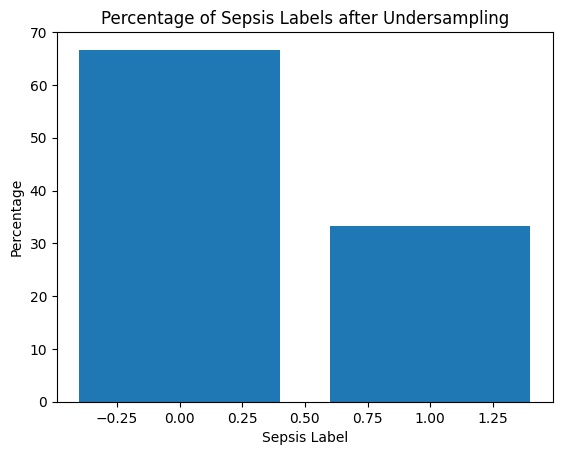

In [242]:
plt.bar(Sepsis_counts.index, Sepsis_percentages)
# Explanation: In this line, you're using the "plt.bar" function to create a bar chart.
# You're providing it with the x-values (Sepsis label categories) and y-values (Sepsis percentages) to
# represent the distribution of sepsis labels after undersampling the dataset.
# This chart visually displays the percentage of each sepsis label in the balanced dataset.
plt.title("Percentage of Sepsis Labels after Undersampling")
# Explanation: Here, you're adding a title to the bar chart to describe what the chart represents.
# In this case, it's the percentage of sepsis labels in the dataset after undersampling.
plt.xlabel("Sepsis Label")
# Explanation: This line sets the label for the x-axis of the bar chart, which specifies the type of data
# or categories being represented.
plt.ylabel("Percentage")
# Explanation: Similarly, this line sets the label for the y-axis of the bar chart.
# It provides information about the measurement represented on the y-axis, which, in this case, is
# the percentage.
plt.show()
# Explanation: Finally, this line displays the bar chart you've created using the "plt.show()" function.
# It shows the chart in your Jupyter Notebook, allowing you to visualize the percentage distribution of
# sepsis labels after undersampling the dataset. This type of visualization is helpful for understanding
# the class balance in your dataset, which is crucial for machine learning tasks.

**LOGISTIC REGRESSION**

In [243]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# This part imports libraries for working with machine learning, including logistic regression, data splitting, cross-validation, and model evaluation.
# It also suppresses warning messages to keep the output clean.

# Separate features and target variables
X = data.drop('SepsisLabel_max', axis=1)
y = data['SepsisLabel_max']
# Here, you are defining the feature variables (X) and the target variable (y) for your machine learning
# model. You use the "SepsisLabel_max" column as the target variable, and all other columns in your
# dataset are used as features.

# Split data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)
# You split your data into training, validation, and testing sets using the train_test_split function.
# The data is divided such that 70% is used for training, 20% for validation, and 10% for testing.
# The random_state parameter ensures reproducibility.

# Define the logistic regression model
clf = LogisticRegression(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search using 5-fold cross-validation on the training set
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# You use grid search to find the best hyperparameters for the logistic regression model.
# The grid search involves five-fold cross-validation to evaluate different hyperparameter combinations.

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training set with the best hyperparameters
clf_best = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
clf_best.fit(X_train, y_train)
# You create a new logistic regression model using the best hyperparameters
# and train it on the training data.

# Evaluate the model performance on the validation set
y_pred_val = clf_best.predict(X_val)
LR_acc_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', LR_acc_val)
print(classification_report(y_val, y_pred_val))
# Explaination : You make predictions on the validation set and evaluate the model's accuracy and generate
# a classification report.

# Evaluate the model performance on the testing set
y_pred_test = clf_best.predict(X_test)
LR_acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing set:', LR_acc_test)
print(classification_report(y_test, y_pred_test))
# Eplaination : You make predictions on the testing set and evaluate the model's accuracy and generate a classification report.
# This assesses how well the trained logistic regression model performs on unseen data.

Best hyperparameters: {'C': 0.01}
Best score: 0.673502538071066
Accuracy on validation set: 0.6493506493506493
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       782
           1       0.67      0.08      0.14       450

    accuracy                           0.65      1232
   macro avg       0.66      0.53      0.46      1232
weighted avg       0.66      0.65      0.55      1232

Accuracy on testing set: 0.6707086017430846
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      1759
           1       0.54      0.09      0.15       880

    accuracy                           0.67      2639
   macro avg       0.61      0.52      0.47      2639
weighted avg       0.63      0.67      0.58      2639



**NAIVE BAYES**

In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes classifier
clf = GaussianNB()

# Define the hyperparameter grid to search over
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8]}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training data with the best hyperparameters
clf_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
clf_best.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = clf_best.predict(X_val)

# Evaluate the model performance on the validation set
NB_acc_val = accuracy_score(y_val, y_pred_val)

# Make predictions on the testing data
y_pred_test = clf_best.predict(X_test)

# Evaluate the model performance on the testing set
NB_acc_test = accuracy_score(y_test, y_pred_test)

# Print the validation and testing accuracy and classification report
print('Validation Accuracy:',NB_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', NB_acc_test)
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'var_smoothing': 1e-10}
Best score: 0.6976649746192893
Validation Accuracy: 0.6801948051948052
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       782
           1       0.70      0.22      0.33       450

    accuracy                           0.68      1232
   macro avg       0.69      0.58      0.56      1232
weighted avg       0.68      0.68      0.62      1232

Testing Accuracy: 0.6763925729442971
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1759
           1       0.54      0.18      0.27       880

    accuracy                           0.68      2639
   macro avg       0.62      0.55      0.53      2639
weighted avg       0.64      0.68      0.62      2639



**SUPPORT VECTOR MACHINE**

In [245]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
clf = SVC(kernel='rbf',C=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Make predictions on the validation set
y_pred_val = clf.predict(X_val)
# Evaluate the model performance on the validation set
SVM_acc_val = accuracy_score(y_val, y_pred_val)
# Make predictions on the testing data
y_pred_test = clf.predict(X_test)
# Evaluate the model performance on the testing set
SVM_acc_test = accuracy_score(y_test, y_pred_test)
print('Validation Accuracy:', SVM_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', SVM_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.6347402597402597
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       782
           1       0.00      0.00      0.00       450

    accuracy                           0.63      1232
   macro avg       0.32      0.50      0.39      1232
weighted avg       0.40      0.63      0.49      1232

Testing Accuracy: 0.6665403561955286
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1759
           1       0.00      0.00      0.00       880

    accuracy                           0.67      2639
   macro avg       0.33      0.50      0.40      2639
weighted avg       0.44      0.67      0.53      2639



**RANDOM FOREST**

In [246]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Train a Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(X_val)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(X_test)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       782
           1       0.76      0.47      0.58       450

    accuracy                           0.75      1232
   macro avg       0.75      0.69      0.70      1232
weighted avg       0.75      0.75      0.73      1232

Testing Accuracy: 0.7468738158393331
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1759
           1       0.67      0.47      0.55       880

    accuracy                           0.75      2639
   macro avg       0.72      0.68      0.69      2639
weighted avg       0.74      0.75      0.73      2639



**COMPARISON OF ACCURACY**

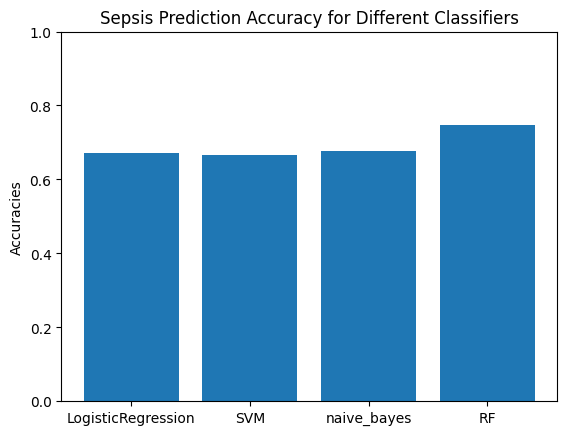

In [247]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_test, SVM_acc_test, NB_acc_test, RF_acc_test]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Accuracy for Different Classifiers')
plt.show()


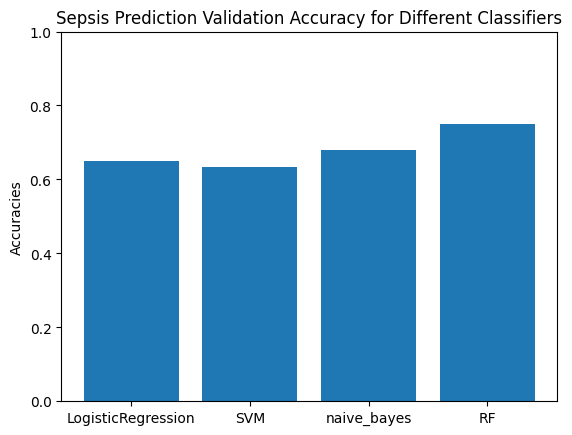

In [248]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_val, SVM_acc_val, NB_acc_val, RF_acc_val]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Validation Accuracy for Different Classifiers')
plt.show()

In [249]:
import pickle

# dump information to that file
pickle.dump(rfc, open('model.pkl', 'wb'))

In [252]:
import pandas as pd
import numpy as np
import joblib  # or just import joblib if you're using a recent version

model_path = 'model.pkl'  # Update this path
model = joblib.load(model_path)

features_no_sepsis_new = [
    3,  # Patient_ID (unique identifier)
   36,
    7.2,
    0,
    0.03,
    17,
    28,
]

# Assuming the necessary imports and model loading have been done
feature_vector_no_sepsis_new = np.array(features_no_sepsis_new).reshape(1, -1)

# Make a prediction using the new feature vector
prediction_new = model.predict(feature_vector_no_sepsis_new)

# Interpret the new prediction
prediction_result_new = "Sepsis" if prediction_new[0] == 1 else "No Sepsis"
print(f"New Prediction: {prediction_result_new}")


New Prediction: No Sepsis
